In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [5]:
cancer_std = StandardScaler().fit_transform(cancer.data)

In [10]:
# 10 차원 축소
pca_10 = PCA(n_components=10)
cancer_10 = pca_10.fit_transform(cancer_std)

In [36]:
pca_10.explained_variance_ratio_, pca_10.explained_variance_ratio_.sum()

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 0.9515688143310318)

In [11]:
# 5 차원 축소
pca_5 = PCA(n_components=5)
cancer_5 = pca_5.fit_transform(cancer_std)

In [37]:
pca_5.explained_variance_ratio_, pca_5.explained_variance_ratio_.sum()

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 0.8473427431581816)

In [12]:
# 2 차원 축소
pca_2 = PCA(n_components=2)
cancer_2 = pca_2.fit_transform(cancer_std)

In [38]:
pca_2.explained_variance_ratio_, pca_2.explained_variance_ratio_.sum()

(array([0.44272026, 0.18971182]), 0.632432076515595)

In [24]:
# 원본 데이터 분류 정확도
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2
)

rf = RandomForestClassifier(random_state=2022)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9298245614035088

In [25]:
# 차원축소 데이터 정확도 측정
pca_cancer = [cancer_10, cancer_5, cancer_2]
for i in range(len(pca_cancer)):
    X_train, X_test, y_train, y_test = train_test_split(
        pca_cancer[i], cancer.target, stratify=cancer.target, test_size=0.2)
    rf= RandomForestClassifier(random_state=2022)
    rf.fit(X_train, y_train)
    print(f'{i+1}th PCA score:',rf.score(X_test, y_test))

1th PCA score: 0.9122807017543859
2th PCA score: 0.9210526315789473
3th PCA score: 0.9210526315789473


In [26]:
# 군집화
kmeans = KMeans(n_clusters=2, random_state=2022)
kmeans.fit(cancer_std)

KMeans(n_clusters=2, random_state=2022)

In [28]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1]), array([375, 194], dtype=int64))

In [29]:
df = pd.DataFrame({
    'PC1':cancer_2[:,0], 'PC2':cancer_2[:,1],
    'target':cancer.target,  'cluster':kmeans.labels_
})
df.head()

,PC1,PC2,target,cluster
0,9.192837,1.948583,0,1
1,2.387802,-3.768172,0,1
2,5.733896,-1.075174,0,1
3,7.122953,10.275589,0,1
4,3.935302,-1.948072,0,1


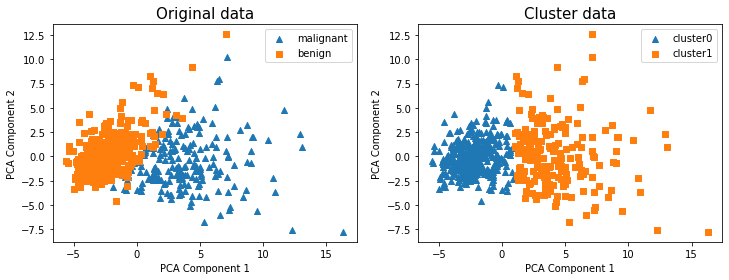

In [32]:
markers = ['^','s']

plt.figure(figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=cancer.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))

    plt.legend()
    plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()